In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [3]:
import tensorflow as tf
import numpy as np


from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()
tf.compat.v1.random.set_random_seed(1234)

In [5]:
stock = pd.read_csv('C:\Jupyter_Project\HSS.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-29,8740,9120,8740,9120,9120,96112
1,2020-01-30,9350,9570,9200,9370,9370,175760
2,2020-01-31,9380,9710,9380,9570,9570,226732
3,2020-02-03,9440,9440,9030,9140,9140,99485
4,2020-02-04,9140,9150,9020,9110,9110,30886


Text(0, 0.5, 'price')

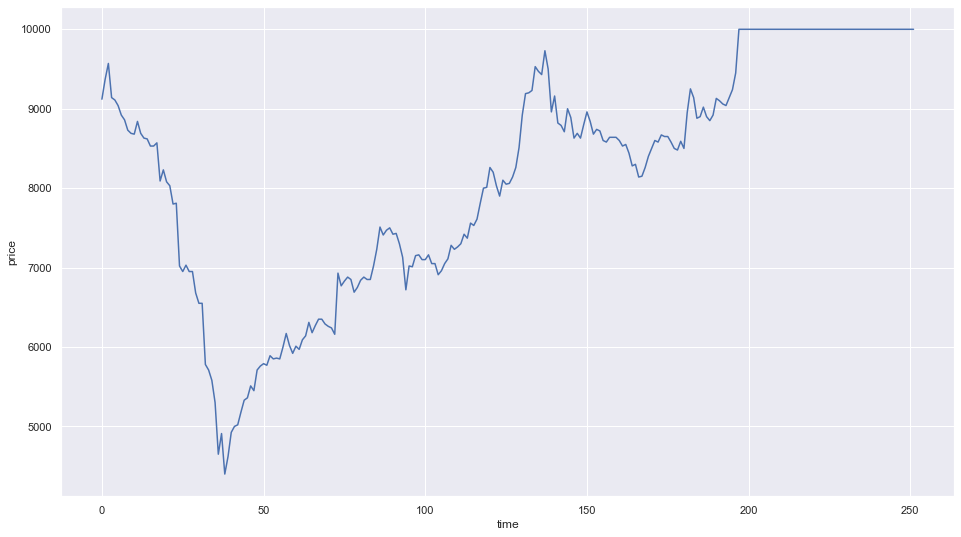

In [6]:
# 학습에 사용될 한양증권 차트입니다

plt.figure(figsize=(16,9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.72194305, 0.75167785, 0.77580071, 0.84285714, 0.0343628 ],
       [0.8241206 , 0.82718121, 0.85765125, 0.8875    , 0.06283925],
       [0.82914573, 0.85067114, 0.88967972, 0.92321429, 0.0810632 ],
       ...,
       [0.93299832, 0.89932886, 1.        , 1.        , 0.03575287],
       [0.93299832, 0.89932886, 1.        , 1.        , 0.03575287],
       [0.93299832, 0.89932886, 1.        , 1.        , 0.03575287]])

In [9]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [10]:
# Train과 Test를 분할합니다

from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close',1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [12]:
x_train.shape, y_train.shape

((201, 4), (201,))

In [13]:
x_test.shape, y_test.shape

((51, 4), (51,))

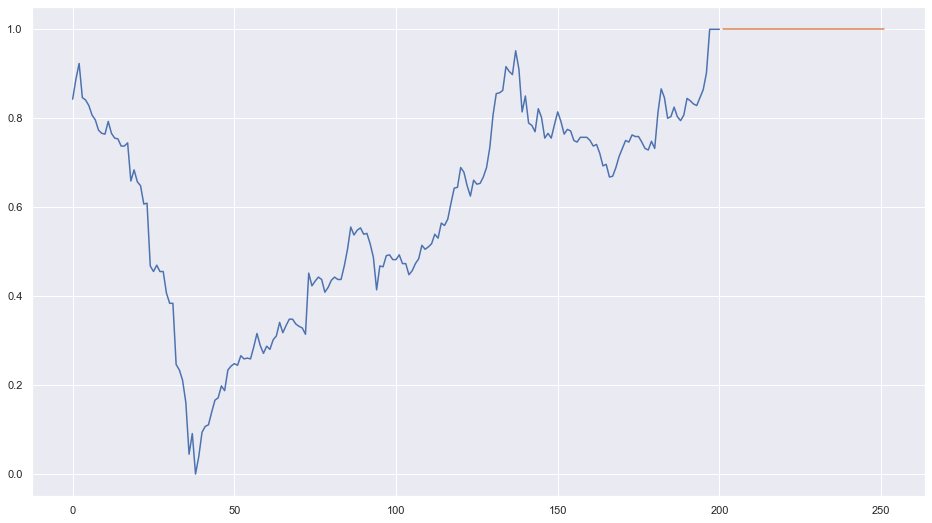

In [14]:
# Train과 Test가 분할된 모습을 차트로 표현했습니다 

plt.figure(figsize=(16,9))
plt.plot(y_train)
plt.plot(y_test)

In [15]:
import tensorflow as tf

In [16]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [17]:
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [29]:
y_train

0      0.842857
1      0.887500
2      0.923214
3      0.846429
4      0.841071
         ...   
196    0.901786
197    1.000000
198    1.000000
199    1.000000
200    1.000000
Name: Close, Length: 201, dtype: float64

In [28]:
y_test

201    1.0
202    1.0
203    1.0
204    1.0
205    1.0
206    1.0
207    1.0
208    1.0
209    1.0
210    1.0
211    1.0
212    1.0
213    1.0
214    1.0
215    1.0
216    1.0
217    1.0
218    1.0
219    1.0
220    1.0
221    1.0
222    1.0
223    1.0
224    1.0
225    1.0
226    1.0
227    1.0
228    1.0
229    1.0
230    1.0
231    1.0
232    1.0
233    1.0
234    1.0
235    1.0
236    1.0
237    1.0
238    1.0
239    1.0
240    1.0
241    1.0
242    1.0
243    1.0
244    1.0
245    1.0
246    1.0
247    1.0
248    1.0
249    1.0
250    1.0
251    1.0
Name: Close, dtype: float64

In [18]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [19]:
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Conv1D(filters=32, kernel_size=5,
          padding="causal",
          activation="relu",
          input_shape=[WINDOW_SIZE, 1]),
    
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [21]:
# loss에는 Huber(), optimizer에는 Adam(), metrics에는 mse를 사용합니다

optimizer = Adam(lr = 0.00001)
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [22]:
# 10번 epoch 동안 val_loss 기준 개선이 없으면 끝나게 설정하였습니다

earlystopping = EarlyStopping(monitor='val_loss', patience=10)
filename = os.path.join('tmp', 'checkpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                            save_weights_only=True,
                            save_best_only=True,
                            monitor='val_loss',
                            verbose=1)

In [23]:
history = model.fit(train_data,
                   validation_data=(test_data),
                   epochs=50,
                   callbacks=[checkpoint, earlystopping])

Epoch 1/50
6/6 [==============================] - 7s 599ms/step - loss: 0.2238 - mae: 0.4208 - val_loss: 0.0693 - val_mae: 0.2632

Epoch 00001: val_loss improved from inf to 0.06930, saving model to tmp\checkpointer.ckpt
Epoch 2/50
6/6 [==============================] - 0s 40ms/step - loss: 0.0183 - mae: 0.1058 - val_loss: 0.0132 - val_mae: 0.1149

Epoch 00002: val_loss improved from 0.06930 to 0.01319, saving model to tmp\checkpointer.ckpt
Epoch 3/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0092 - mae: 0.0675 - val_loss: 0.0210 - val_mae: 0.1450

Epoch 00003: val_loss did not improve from 0.01319
Epoch 4/50
6/6 [==============================] - 0s 36ms/step - loss: 0.0129 - mae: 0.0815 - val_loss: 0.0082 - val_mae: 0.0903

Epoch 00004: val_loss improved from 0.01319 to 0.00815, saving model to tmp\checkpointer.ckpt
Epoch 5/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0106 - mae: 0.0712 - val_loss: 0.0150 - val_mae: 0.1226

Epoch 00005: val_los

In [24]:
model.load_weights(filename)

In [25]:
# test_data를 활용하여 예측을 진행했습니다

pred = model.predict(test_data)

In [26]:
pred.shape

(31, 1)

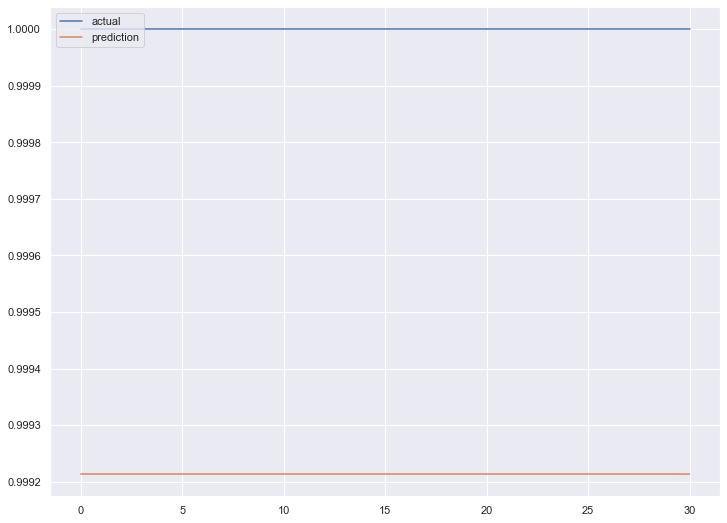

In [27]:
# 예측 데이터는 20일치 데이터로 21일치를 예측합니다. 
# test_data로 예측할 때 앞에 20일은 예측하지 않습니다 

plt.figure(figsize=(12,9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend(loc='upper left')
plt.show()

In [30]:
pred = model.predict(test_data)

In [ ]:
A = 